In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
df = pd.read_csv("data.csv")
                # index_col = 'Year',
                # parse_dates=False)
df[:5]

,ItemID,Year,Quantity,VehID
0,515003,2006,184840,2006FordRanger-515003-2006
1,515036,2006,78034,2006CadillacEscalade-515036-2006
2,515036,2006,14038,2006CadillacEscalade EXT-515036-2006
3,515036,2006,915939,2006ChevroletSilverado 1500-515036-2006
4,515036,2006,322982,2006ChevroletTahoe-515036-2006


In [145]:
# utilizing mask to filiter year 2007 
itemID = ['515096']
mask = df['ItemID'].isin(itemID)
item515096 = df[mask]
item515096[:10]
year2007 = [2007]
mask2 = item515096['Year'].isin(year2007)
item2007 = item515096[mask2]
for index, row in item2007.iterrows(): # nice method to use
    print(index, row['Quantity'])

1245 73308
1246 15934
1247 111100
1248 890290
1249 292512
1250 299870
1251 126856


In [136]:
# calculating total for year 2007
total_2007 = 0
for index, row in item2007.iterrows(): # nice method to use
    quantity = row['Quantity']
    total_2007 += quantity

total_2007

1809870

In [137]:
# creating a dictionary for all year manufacture
yearly_total = {}
for index, row in item515096.iterrows(): # nice method to use
    year = row['Year']
    quantity = row['Quantity']
    if year not in yearly_total:
        yearly_total[year] = quantity
    else:
        yearly_total[year] += quantity
print(yearly_total)
years = list(yearly_total.keys())
print(years)

{2007: 1809870, 2008: 1300999, 2009: 893661, 2010: 1116552, 2011: 1006239, 2012: 1180620, 2013: 1243104, 2014: 317554}
[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [138]:
# creating the prediction of all total demand in the after-market (2010 -> 2027)
scrappage_rate = 0.05
after_market = {}
for current_year in range(2010,2028,1):
    # check year that are in the after-market
    start_year = current_year -13
    end_year = current_year -3
    if(start_year < 2007):
        start_year = 2007
    year_included = years[start_year -2007:end_year-2007+1]
    #print(current_year,": ", year_included)
    #### calculate total up to current year###
    total = 0
    for year in year_included:
        total += yearly_total[year] *0.95**(current_year-(year+3)+1) ## 0.95 should be multiply extra n times for extra n years after 2010, 2010 is 1 time
        #print(year, ": " + str(current_year-(year+3)+1) + "times")
    after_market[current_year] = int(total)
    #print(current_year, total)
        
after_market

{2010: 1719376,
 2011: 2869356,
 2012: 3574866,
 2013: 4456847,
 2014: 5189932,
 2015: 6052024,
 2016: 6930372,
 2017: 6885530,
 2018: 6541253,
 2019: 6214190,
 2020: 5903481,
 2021: 4630325,
 2022: 3695801,
 2023: 3028112,
 2024: 2273367,
 2025: 1615967,
 2026: 897208,
 2027: 180624}

In [139]:
# turn the dictionary into a df
result = pd.DataFrame(after_market.items(), columns=['Year', 'Qty'])
result

,Year,Qty
0,2010,1719376
1,2011,2869356
2,2012,3574866
3,2013,4456847
4,2014,5189932
5,2015,6052024
6,2016,6930372
7,2017,6885530
8,2018,6541253
9,2019,6214190


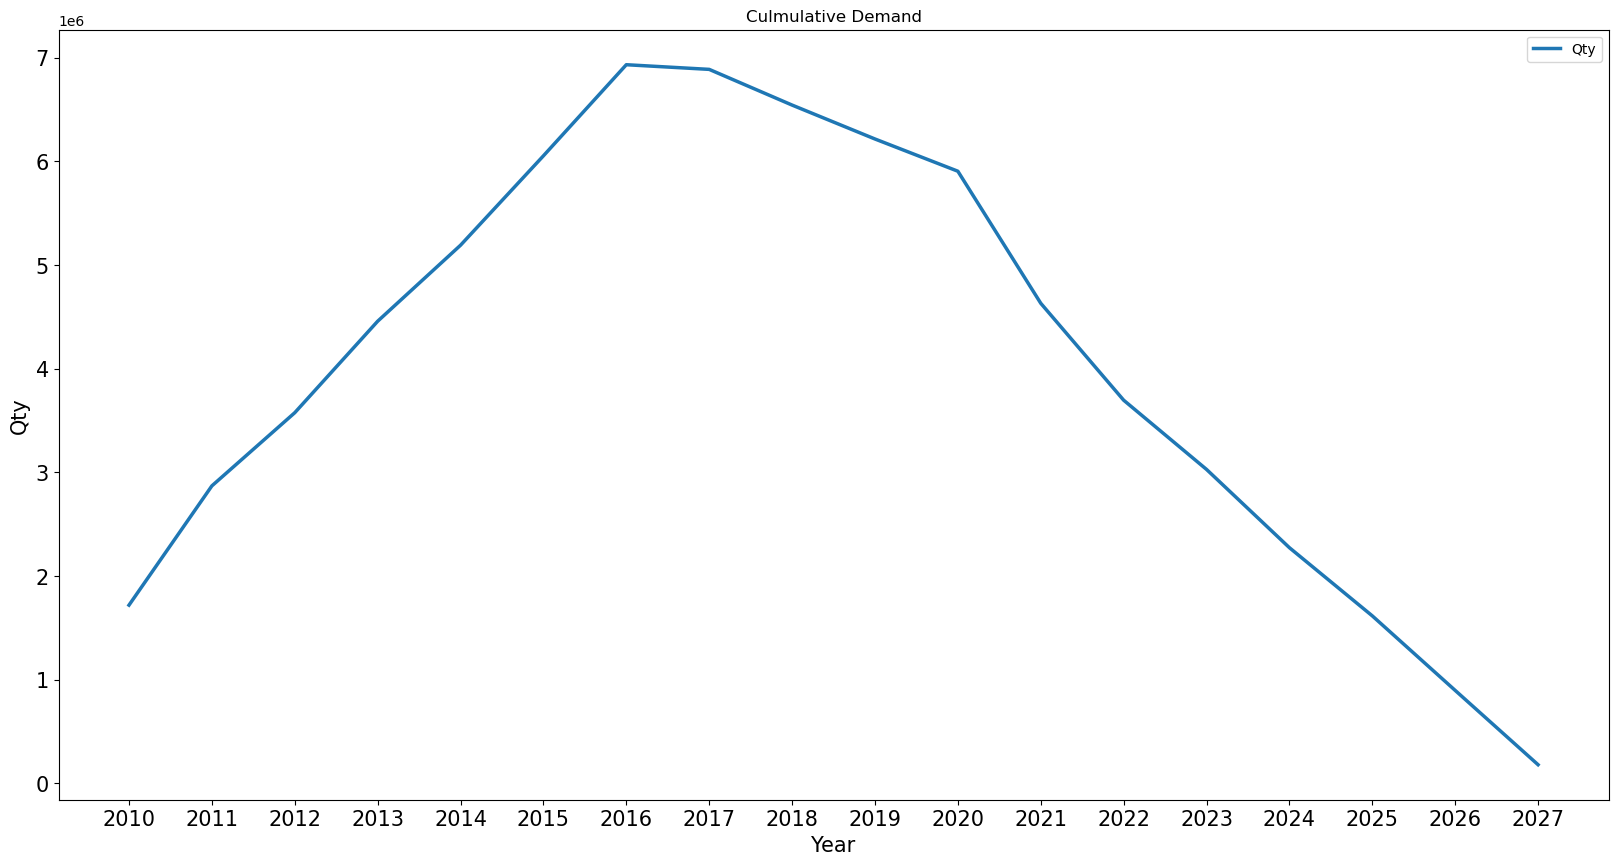

In [140]:
# plot the data
#result.plot(x="Year", y="Qty", kind="line") 
result['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result.index,result["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()